In [21]:
import pandas as pd

In [22]:
prepared_data = pd.read_csv(r"../Data/03_Prepared_data.csv")
prepared_data.head(5)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


In [23]:
print('shape',prepared_data.shape)

shape (699, 9)


In [24]:
dfx = prepared_data.drop(["Class"], axis=1)
print(dfx.shape)
dfx.head()

(699, 8)


,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = prepared_data["Class"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(dfx, y, test_size = 0.15, shuffle=True, random_state = 0)
print("x_train_valid shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train_valid shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train_valid shape (594, 8)
x_test shape (105, 8)
y_train_valid shape (594,)
y_test shape (105,)


In [28]:
x_train.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,5,2,2,1,1,2,1,1
666,5,2,2,2,1,1,1,2
235,3,4,1,2,1,3,1,1
480,5,1,1,1,1,1,1,1
645,3,1,1,2,1,2,1,1


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [30]:
parameters1 = {'max_depth':range(1,51),'n_estimators':[1], 'random_state' : [4]}
scores = ['recall', 'accuracy', 'roc_auc']
grid = GridSearchCV(RandomForestClassifier(), parameters1, cv=5, scoring=scores, refit=False)
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 51), 'n_estimators': [1],
                         'random_state': [4]},
             refit=False, scoring=['recall', 'accuracy', 'roc_auc'])

In [31]:
df1 = pd.DataFrame.from_dict(grid.cv_results_.copy())

In [32]:
df11 = df1[['param_max_depth', 'param_n_estimators', 'params', 'mean_test_recall', 'mean_test_accuracy', 'mean_test_roc_auc']].copy()
df12 = df11.sort_values(by = 'mean_test_recall', ascending = False)
df12.head(5)

,param_max_depth,param_n_estimators,params,mean_test_recall,mean_test_accuracy,mean_test_roc_auc
4,5,1,"{'max_depth': 5, 'n_estimators': 1, 'random_st...",0.920732,0.947842,0.951814
5,6,1,"{'max_depth': 6, 'n_estimators': 1, 'random_st...",0.906220,0.944524,0.940520
3,4,1,"{'max_depth': 4, 'n_estimators': 1, 'random_st...",0.906098,0.947856,0.961583
6,7,1,"{'max_depth': 7, 'n_estimators': 1, 'random_st...",0.896098,0.944524,0.933872
1,2,1,"{'max_depth': 2, 'n_estimators': 1, 'random_st...",0.891585,0.944481,0.930018


In [33]:
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.graph_objects as go 

ModuleNotFoundError: No module named 'ipywidgets'

In [35]:
df11plot = df11[['param_max_depth', 'mean_test_recall']]
def f(i):
    fig = go.Figure(data = go.Scatter(x = df11plot['param_max_depth'][0:i], y = df11plot['mean_test_recall'][0:i]))
    fig.update_layout(autosize = False, width = 800, height= 500, title = 'Figure1', xaxis_title = 'max_depth',
                      yaxis_title = 'mean_test_recall')
    fig.show()
    
interact(f, i=widgets.IntSlider(min=1, max=50, step=1, description = 'n_estimators_values', ))

NameError: name 'interact' is not defined

In [36]:
parameters2 = {'max_depth':[1],'n_estimators':range(1,51), 'random_state' : [4]}
scores = ['recall', 'accuracy', 'roc_auc']
grid2 = GridSearchCV(RandomForestClassifier(), parameters2, cv=5, scoring=scores, refit=False)
grid2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1], 'n_estimators': range(1, 51),
                         'random_state': [4]},
             refit=False, scoring=['recall', 'accuracy', 'roc_auc'])

In [37]:
df2 = pd.DataFrame.from_dict(grid2.cv_results_.copy())

In [38]:
df21 = df2[['param_max_depth', 'param_n_estimators', 'params', 'mean_test_recall', 'mean_test_accuracy', 'mean_test_roc_auc']].copy()
df22 = df21.sort_values(by = 'mean_test_recall', ascending = False)
df22.head(5)

,param_max_depth,param_n_estimators,params,mean_test_recall,mean_test_accuracy,mean_test_roc_auc
10,1,11,"{'max_depth': 1, 'n_estimators': 11, 'random_s...",0.950854,0.963011,0.988206
31,1,32,"{'max_depth': 1, 'n_estimators': 32, 'random_s...",0.950732,0.964692,0.988937
33,1,34,"{'max_depth': 1, 'n_estimators': 34, 'random_s...",0.950732,0.964692,0.989061
12,1,13,"{'max_depth': 1, 'n_estimators': 13, 'random_s...",0.945976,0.963011,0.987329
29,1,30,"{'max_depth': 1, 'n_estimators': 30, 'random_s...",0.945854,0.963011,0.989123


In [39]:
df21plot = df21[['param_n_estimators', 'mean_test_recall']]
def f(i):
    fig = go.Figure(data = go.Scatter(x = df11plot['param_n_estimators'][0:i], y = df11plot['mean_test_recall'][0:i]))
    fig.update_layout(autosize = False, width = 800, height= 500, title = 'Figure2', xaxis_title = 'n_estimators',
                      yaxis_title = 'mean_test_recall')
    fig.show()
    
interact(f, i=widgets.IntSlider(min=1, max=50, step=1, description = 'n_estimators_values', ))

NameError: name 'interact' is not defined

In [40]:
parameters4 = {'max_depth':range(1,31),'n_estimators':range(1,51), 'random_state' : [4]}
scores = ['recall', 'accuracy', 'roc_auc']
grid4 = GridSearchCV(RandomForestClassifier(), parameters4, cv=5, scoring=scores, refit=False)
grid4.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(1, 51), 'random_state': [4]},
             refit=False, scoring=['recall', 'accuracy', 'roc_auc'])

In [30]:
df4 = pd.DataFrame.from_dict(grid4.cv_results_.copy())

In [42]:
df41 = df4[['param_max_depth', 'param_n_estimators', 'params', 'mean_test_recall', 'mean_test_accuracy', 'mean_test_roc_auc']].copy()
df42 = df41.sort_values(by = 'mean_test_recall', ascending = False)
df42.head(5)

,param_max_depth,param_n_estimators,params,mean_test_recall,mean_test_accuracy,mean_test_roc_auc
297,6,48,"{'max_depth': 6, 'n_estimators': 48}",0.990122,0.976471,0.991294
329,7,30,"{'max_depth': 7, 'n_estimators': 30}",0.990122,0.976471,0.990219
193,4,44,"{'max_depth': 4, 'n_estimators': 44}",0.990122,0.973109,0.991671
226,5,27,"{'max_depth': 5, 'n_estimators': 27}",0.990122,0.976456,0.990087
324,7,25,"{'max_depth': 7, 'n_estimators': 25}",0.990122,0.974790,0.988164


In [46]:
df43 = df42[['param_max_depth', 'param_n_estimators', 'mean_test_recall']]
def f(i):
        fig = px.scatter_3d(df43[0:i], x = 'param_max_depth', y = 'param_n_estimators',
                        z = 'mean_test_recall', color = df43['mean_test_recall'][0:i] * 1000 )
        fig.show()
    
interact(f, i=widgets.IntSlider(min=1, max=20, step=1, description = 'N of points', ))

interactive(children=(IntSlider(value=1, description='N of points', max=20, min=1), Output()), _dom_classes=('…

<function __main__.f(i)>

In [41]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [42]:
rfr = RandomForestClassifier( max_depth = 6, n_estimators = 48)
rfr.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=48)

In [43]:
rfrscortest = classification_report(y_test, rfr.predict(x_test))
print(rfrscortest)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [46]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

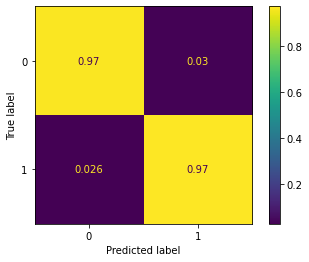

In [47]:
plot_confusion_matrix(rfr,x_test, y_test, normalize='true')
plt.show()

## Saving the model via pickle

In [48]:
## import pickle
## filename = r'../Trained models/RandomForest_trained.sav'
## pickle.dump(rfr, open(filename, 'wb'))